In [88]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (0.0)
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.


In [89]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.


In [171]:
import pandas as pd
import numpy as np
import seaborn as sn
from graphviz import Source
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [91]:
df = pd.read_csv("data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [92]:
# Categorical Data List
pred_classes = df.koi_disposition.unique()
pred_classes

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [121]:
# Columns names for chosing features
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

# Explore DataSet and Select features (columns)

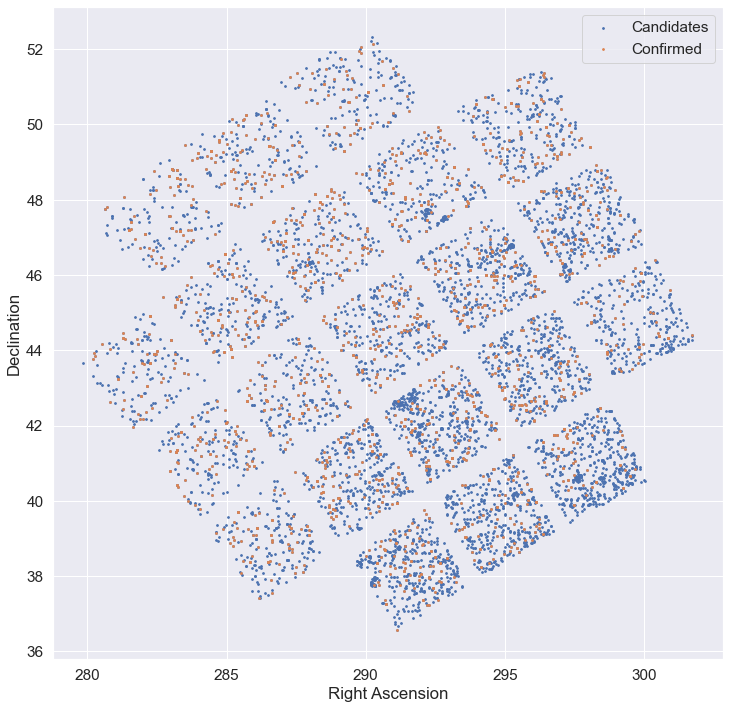

In [188]:
# Right Ascension and Declination
confirmed = df[df.koi_disposition == 'CONFIRMED']

ra, dec = df.ra, df.dec
ra_c, dec_c = confirmed.ra, confirmed.dec
fig = plt.figure(figsize=(12, 12))

plt.scatter(ra, dec, s=3, label='Candidates')
plt.scatter(ra_c, dec_c, s=3, label="Confirmed")

plt.xlabel("Right Ascension")
plt.ylabel("Declination")

plt.legend()

In [189]:
# Saving plot
fig.savefig('images/ascension.png')

Text(0.5, 1.0, 'Surface gravity')

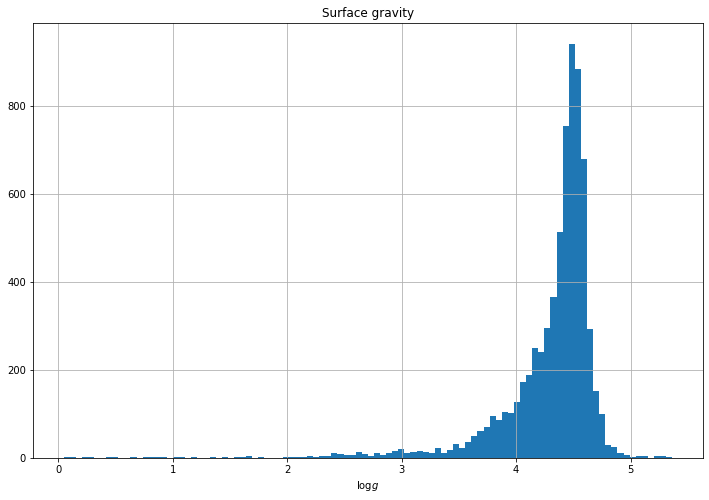

In [95]:
# Surface gravity of stars
ax = df.koi_slogg.hist(bins=100, figsize=(12, 8))
ax.set_xlabel("$\log{g}$")
ax.set_title("Surface gravity")

Text(0.5, 0, 'Duration of transit (hours)')

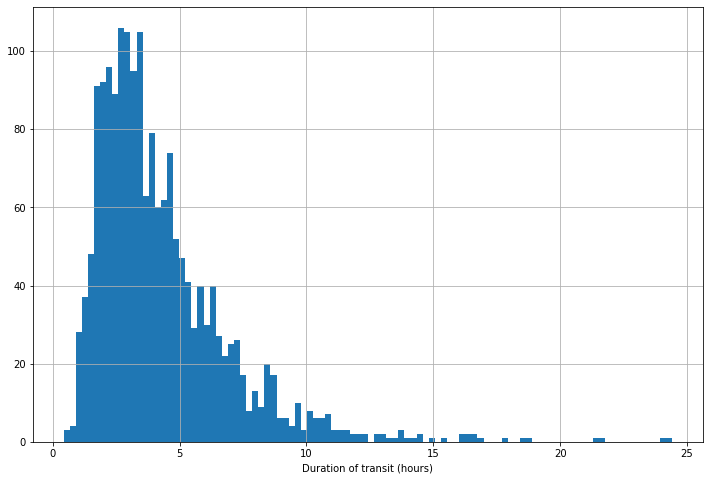

In [96]:
# Duration of planetary transits
ax = confirmed.koi_duration.hist(bins=100, figsize=(12, 8))
ax.set_xlabel("Duration of transit (hours)")

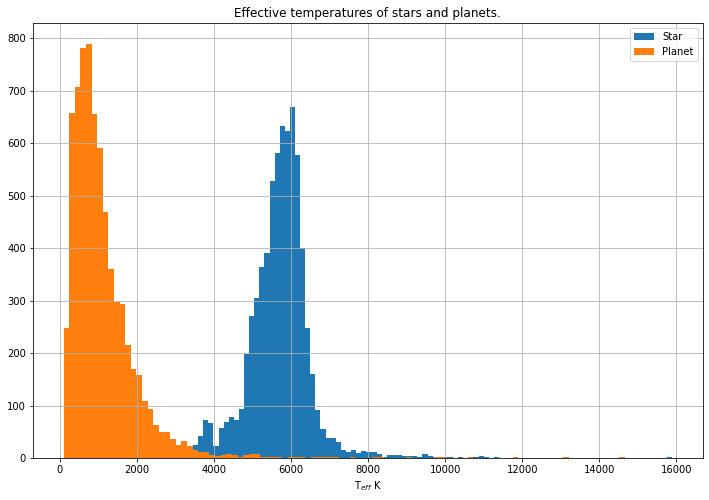

In [97]:
# Temperatures and Radii of stars and planets
ax = df.koi_steff.hist(bins=100, figsize=(12, 8), label="Star")
ax.set_xlabel("T$_{eff}$ K")
ax.set_title("Effective temperatures of stars and planets.")

df.koi_teq.hist(ax=ax, bins=100, label='Planet')
ax.legend()

In [190]:
# Saving plot
fig.savefig('images/temperature.png')

In [98]:
# Split Data into 2 datasets: Candidate Data and Model Data
candidate_data = df[df['koi_disposition']=='CANDIDATE']
model_data = df[df['koi_disposition']!='CANDIDATE']
model_data.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [99]:
# Set features. This will also be used as your x values.
select_data = model_data[[ 'koi_disposition', 'koi_period', 'koi_steff',  'koi_depth',  'koi_duration', 'koi_teq', 'koi_insol', 'koi_slogg', 'koi_kepmag']]

In [100]:
select_data.head()

,koi_disposition,koi_period,koi_steff,koi_depth,koi_duration,koi_teq,koi_insol,koi_slogg,koi_kepmag
0,CONFIRMED,54.418383,5455,874.8,4.50700,443,9.11,4.467,15.347
1,FALSE POSITIVE,19.899140,5853,10829.0,1.78220,638,39.30,4.544,15.436
2,FALSE POSITIVE,1.736952,5805,8079.2,2.40641,1395,891.96,4.564,15.597
3,CONFIRMED,2.525592,6031,603.3,1.65450,1406,926.16,4.438,15.509
4,CONFIRMED,4.134435,6046,686.0,3.14020,1160,427.65,4.486,15.714


In [115]:
feature_names = ['koi_period', 'koi_depth', 'koi_teq', 'koi_insol', 'koi_slogg', 'koi_duration', 'koi_kepmag']
target_names = 'koi_disposition'
X = select_data[feature_names]
y = select_data[target_names]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [102]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [103]:
X_train.head()

,koi_period,koi_depth,koi_teq,koi_insol,koi_slogg,koi_duration,koi_kepmag
6742,235.206130,642.0,230,0.66,4.648,6.989,15.917
3453,3.000119,7.7,2566,10247.93,3.970,6.610,11.960
674,4.487588,112.0,1305,684.07,4.227,2.874,13.446
5211,98.102098,184.4,525,17.96,4.224,1.225,13.557
1786,44.616751,239.7,693,54.56,4.220,7.831,13.791


In [104]:
y_test.head()

590          CONFIRMED
4592    FALSE POSITIVE
4126    FALSE POSITIVE
3028         CONFIRMED
87           CONFIRMED
Name: koi_disposition, dtype: object

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [105]:
# Scale your data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled

array([[2.90468929e-01, 4.11511073e-04, 9.46826758e-03, ...,
        8.80237230e-01, 5.79749671e-02, 8.10265230e-01],
       [3.33915291e-03, 0.00000000e+00, 1.69742710e-01, ...,
        7.50526114e-01, 5.47448553e-02, 4.52068435e-01],
       [5.17845293e-03, 6.76660964e-05, 8.32246998e-02, ...,
        7.99693897e-01, 2.29039643e-02, 5.86584593e-01],
       ...,
       [1.98086880e-03, 5.66457352e-02, 1.44082333e-01, ...,
        7.75779606e-01, 3.80786715e-02, 7.33049697e-01],
       [5.66936711e-02, 2.26822399e-01, 3.80789022e-02, ...,
        7.38664626e-01, 1.61125477e-01, 4.90721463e-01],
       [4.99154813e-03, 6.53954220e-05, 9.33790738e-02, ...,
        7.81710350e-01, 3.37320831e-02, 4.28894723e-01]])

# Decision Tree Model

In [197]:
# Create and score a decision tree classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8077285579641847

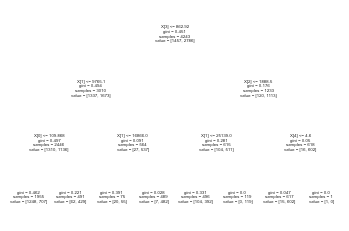

In [194]:
tree.plot_tree(clf);

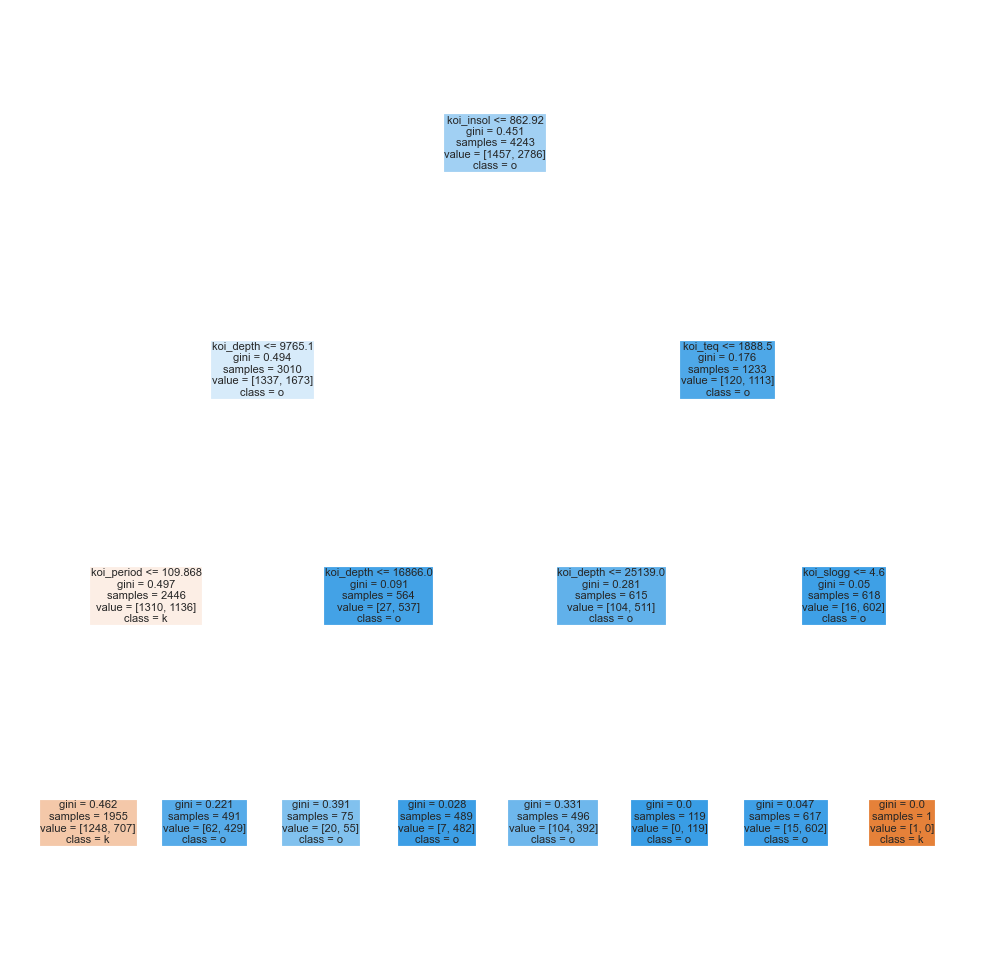

In [195]:
# Decision Tree Visualization
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = feature_names, 
               class_names=target_names,
               filled = True);

In [196]:
fig.savefig('images/decisiontree.png')

# Random Forest Model

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
# Create a random forest classifier 
# Use not scaled data
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8586239396795476

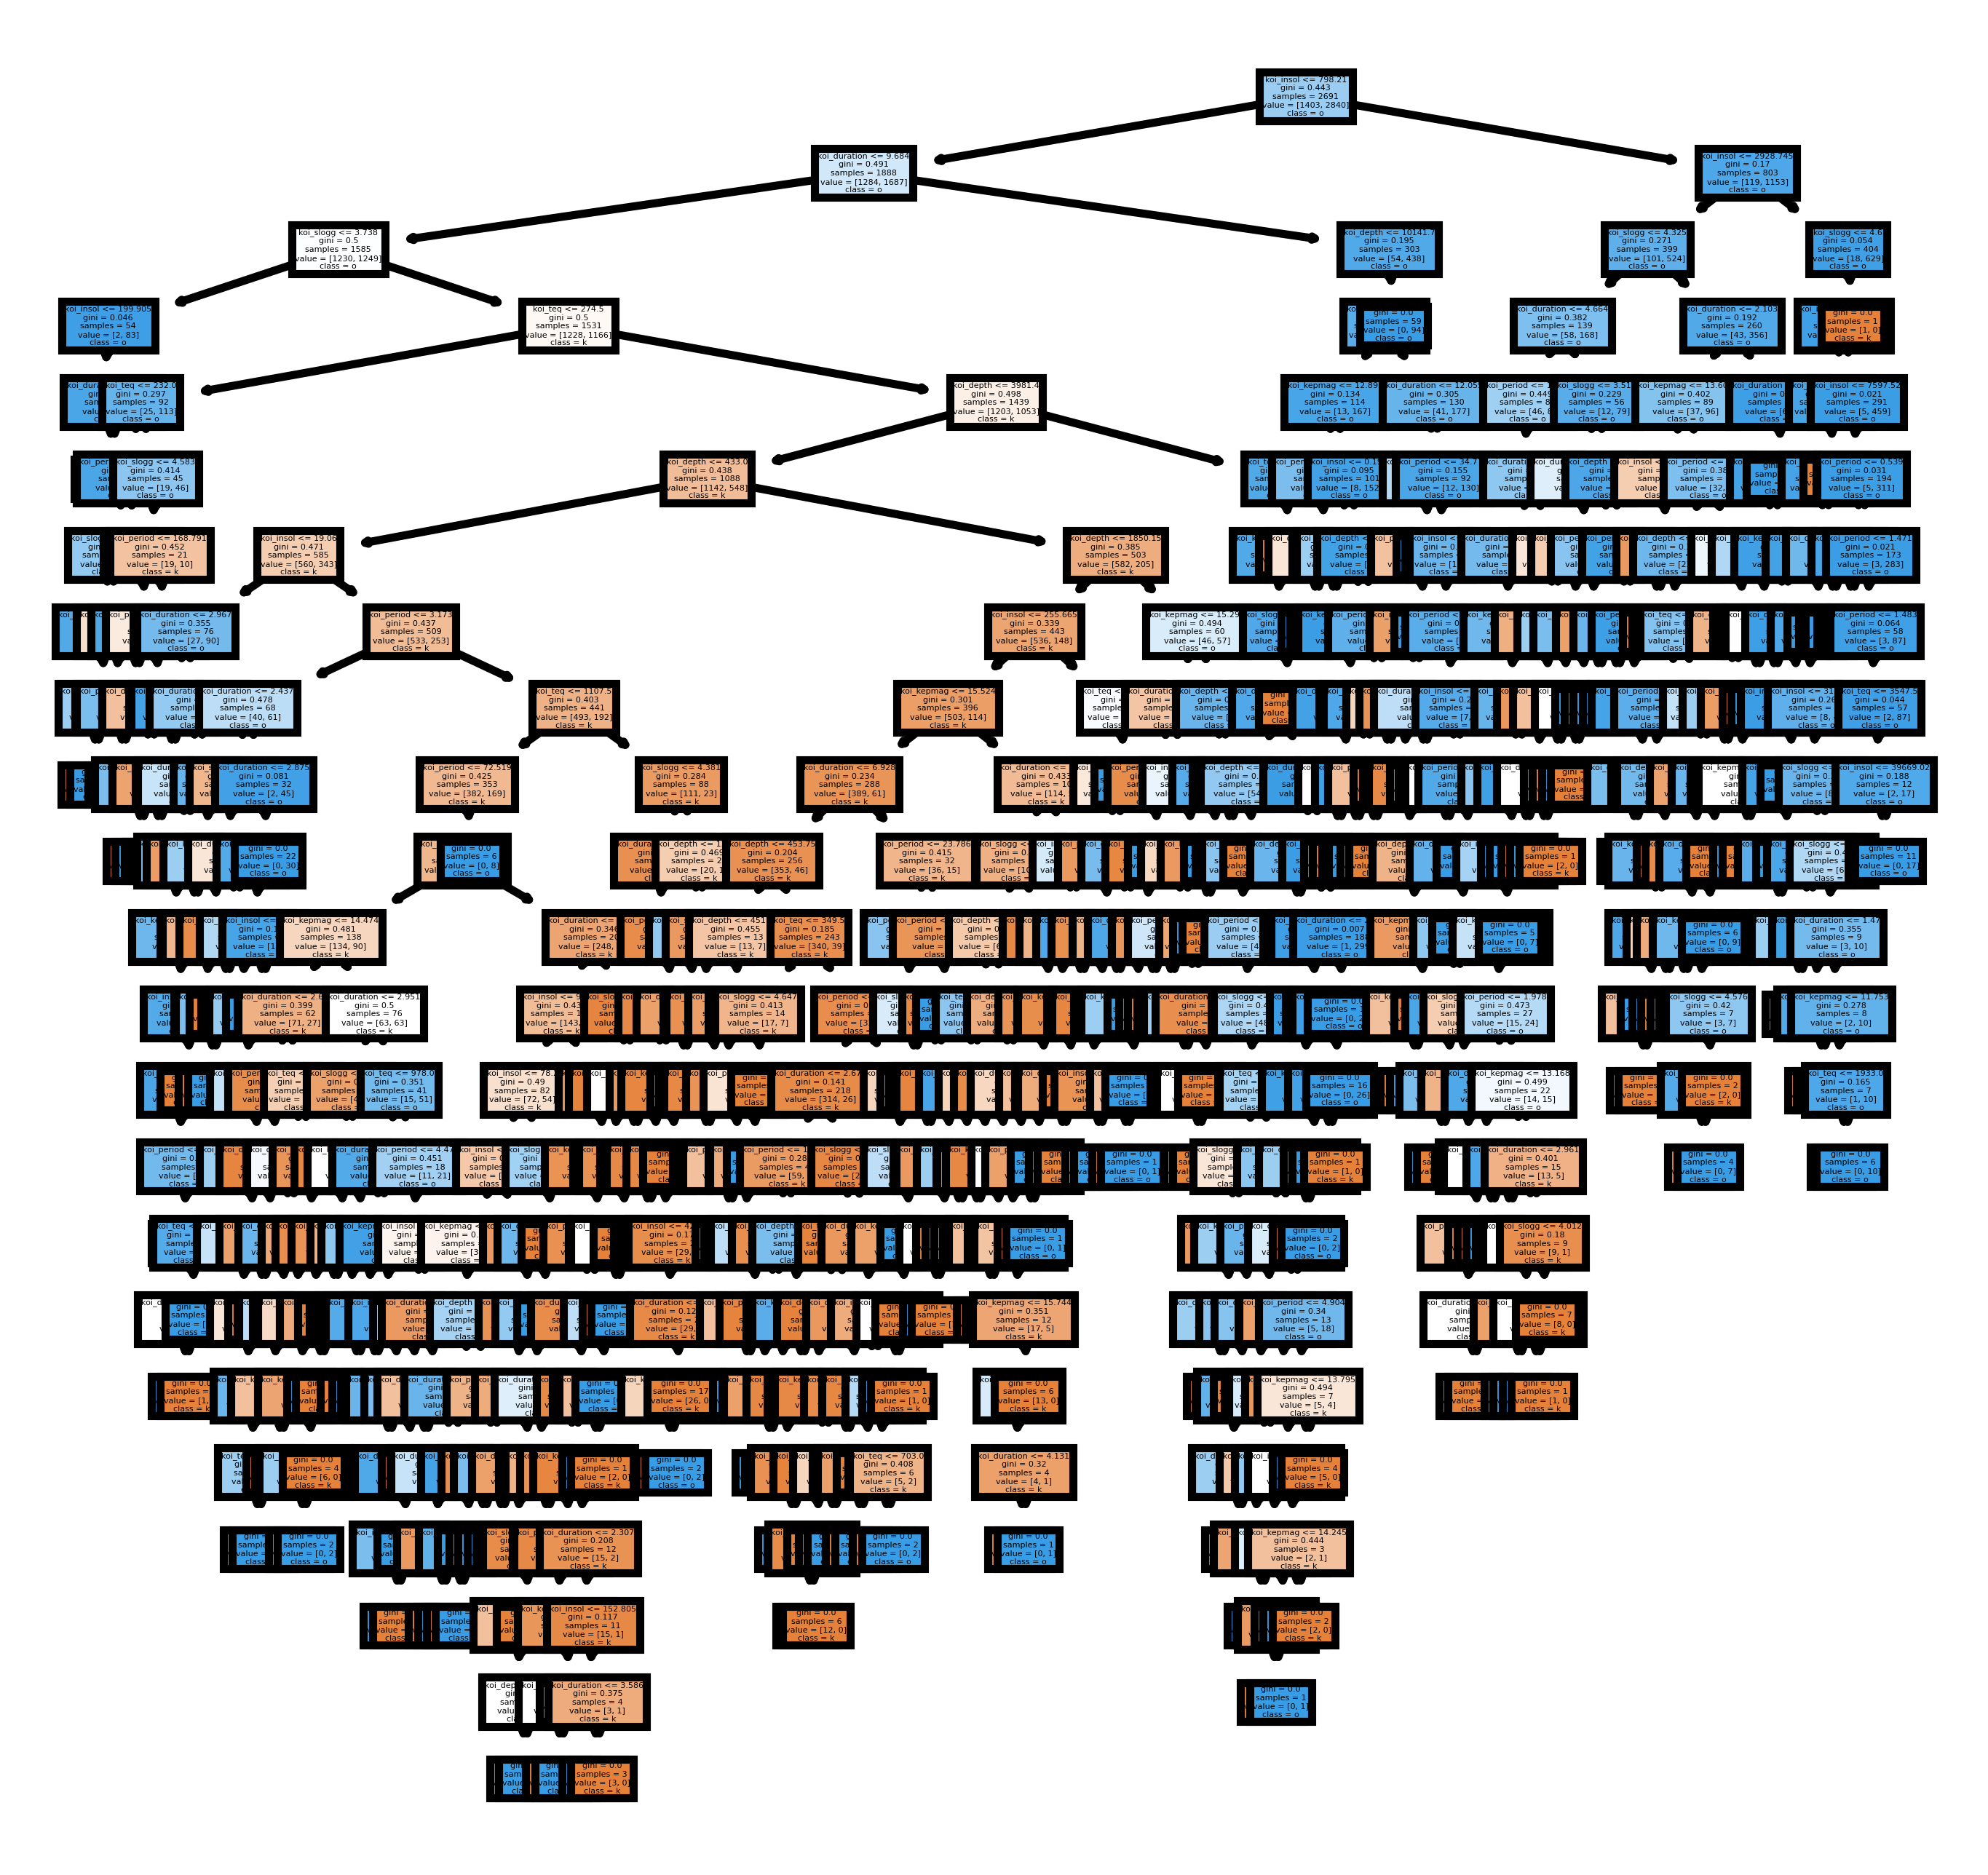

In [120]:
# Estimators Visualization
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = feature_names, 
               class_names=target_names,
               filled = True);

In [122]:
# Saving model
fig.savefig('images/rf_individualtree.png')

In [133]:
# from IPython.display import SVG
# graph = Source( tree.export_graphviz(rf.estimators_[0], out_file=None, feature_names=X.columns))
# SVG(graph.pipe(format='svg'))
# Source( tree.export_graphviz(rf.estimators_[0], out_file=None, feature_names=X.columns))

# K-Nearest Neighbors Classifier

In [109]:
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.776
k: 3, Train/Test Score: 0.892/0.817
k: 5, Train/Test Score: 0.871/0.828
k: 7, Train/Test Score: 0.857/0.827
k: 9, Train/Test Score: 0.852/0.820
k: 11, Train/Test Score: 0.842/0.821
k: 13, Train/Test Score: 0.837/0.822
k: 15, Train/Test Score: 0.834/0.818
k: 17, Train/Test Score: 0.835/0.816
k: 19, Train/Test Score: 0.835/0.811


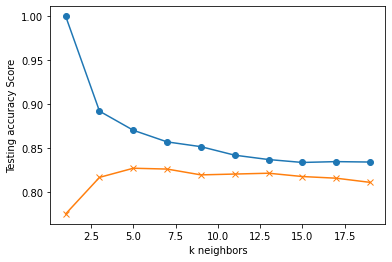

In [110]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [111]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.820


In [152]:
# Building Prediction
predicted_disposition = knn.predict(X_test_scaled)
correct = [y_test.values[n] == predicted_disposition[n] for n in range(len(y_test)) ]
predict_df = pd.DataFrame({"Actual": y_test, "Predicted": predicted_disposition, "Correct": correct} )

In [153]:
predict_df

['CONFIRMED' 'FALSE POSITIVE' 'FALSE POSITIVE' 'CONFIRMED'
 'FALSE POSITIVE' 'FALSE POSITIVE' 'FALSE POSITIVE' 'FALSE POSITIVE'
 'CONFIRMED' 'FALSE POSITIVE' 'CONFIRMED' 'FALSE POSITIVE'
 'FALSE POSITIVE' 'FALSE POSITIVE' 'FALSE POSITIVE' 'CONFIRMED'
 'CONFIRMED' 'CONFIRMED' 'CONFIRMED' 'FALSE POSITIVE']


,Actual,Predicted,Correct
590,CONFIRMED,CONFIRMED,True
4592,FALSE POSITIVE,FALSE POSITIVE,True
4126,FALSE POSITIVE,FALSE POSITIVE,True
3028,CONFIRMED,CONFIRMED,True
87,CONFIRMED,FALSE POSITIVE,False
...,...,...,...
2301,CONFIRMED,FALSE POSITIVE,False
4086,CONFIRMED,FALSE POSITIVE,False
1632,CONFIRMED,FALSE POSITIVE,False
811,FALSE POSITIVE,FALSE POSITIVE,True


K-Nearest Neighbors Classifier Output: k=9 Test Acc: 0.820
Matrix output:
[[278  65]
 [126 592]]


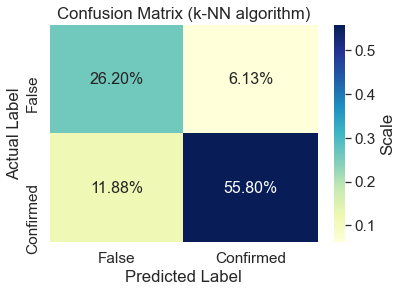

In [179]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predicted_disposition)
plt.title("Confusion Matrix (k-NN algorithm)")
sn.set(font_scale=1.4) # for label size
ax = sn.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', annot_kws={"size": 16}, cmap="YlGnBu", cbar_kws={'label': 'Scale'}) 

# define labels
labels = ["False", "Confirmed"]
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set(ylabel="Actual Label", xlabel="Predicted Label")
print('K-Nearest Neighbors Classifier Output: k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))
print('Matrix output:')
print(matrix)

# SVC Model

#### Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [24]:
# Create the GridSearchCV model
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

SVC(kernel='linear')

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [27]:
# Train the model
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.709, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.710, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.726, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.710, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.726, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.709, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.710, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.726, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.710, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.726, total=   0.2s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   11.8s finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [198]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 50, 'gamma': 0.0001}
0.7984882325488366


# Save the Model

In [ ]:
# save model
import joblib
filename = 'scv_model.sav'
joblib.dump(model, filename)